In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
boston = load_boston()

In [46]:
x = pd.DataFrame(boston.data)
x.columns = boston.feature_names
x_full = pd.DataFrame(boston.data)
x_full.columns = boston.feature_names
x_full['MEDV'] = boston.target
y=pd.DataFrame(boston.target)
y.columns=['MEDV']

построим и оценим модель на  всех данных

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=42)
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))#
print(f'Train: {rmse}')
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))# 
print(f'Test: {rmse}')

Train: 4.748208239685937
Test: 4.638689926172811


In [47]:
x_full.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Рассмотрим переменную CRIM

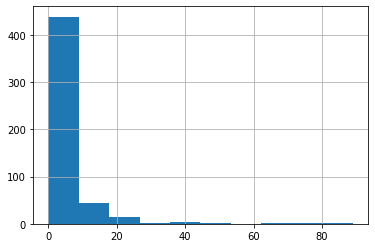

In [5]:
x_full.CRIM.hist()

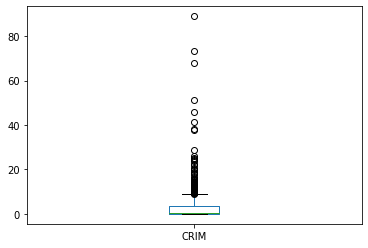

In [6]:
x_full.CRIM.plot(kind='box')

Удалим  выбросы более 40

In [48]:
x_full = x_full[x_full.CRIM < 40]
x_full.shape

(500, 14)

Рассмотрим переменную ZN

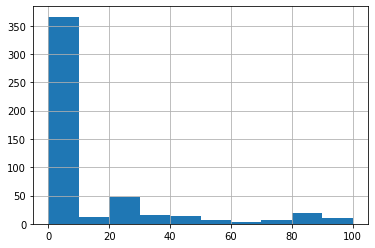

In [8]:
x_full.ZN.hist()

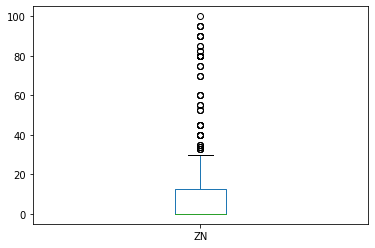

In [9]:
x_full.ZN.plot(kind='box')

Тут нечего исправлять

Рассмотрим переменную INDUS

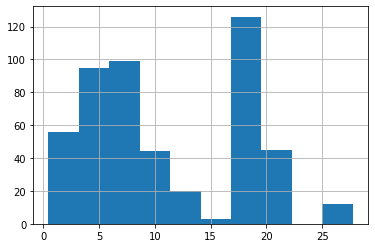

In [10]:
x_full.INDUS.hist()

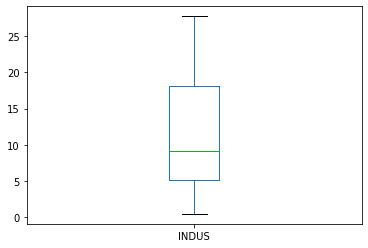

In [11]:
x_full.INDUS.plot(kind='box')

Оставляем эту переменную без изменений

Рассмотрим CHAS

In [12]:
x_full.CHAS.value_counts()

0.0    465
1.0     35
Name: CHAS, dtype: int64

Судя по описанию переменной она не влияет на целевую перенную, поэтому её можно удалить из наших данных

In [49]:
del x_full['CHAS']

Рассмотрим NOX

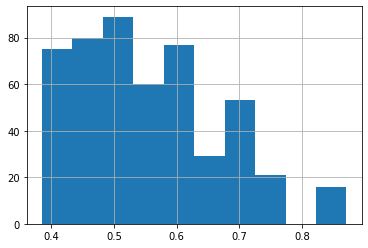

In [14]:
x_full.NOX.hist()

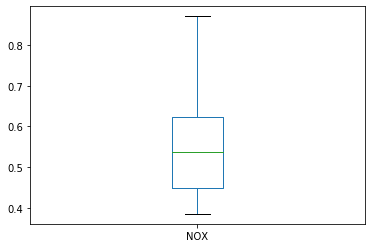

In [15]:
x_full.NOX.plot(kind='box')

Оставляем эту переменную без изменений

Рассмотрим RM

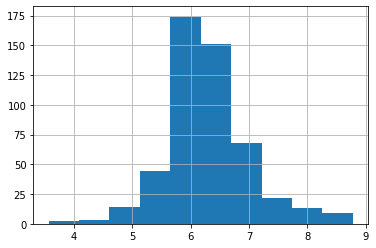

In [16]:
x_full.RM.hist()

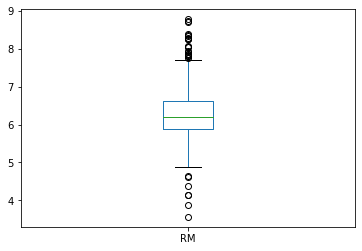

In [17]:
x_full.RM.plot(kind='box')

Удалим выбросы меньше 4

In [50]:
x_full = x_full[x_full.RM > 4]
x_full.shape

(498, 13)

Рассмотрим AGE

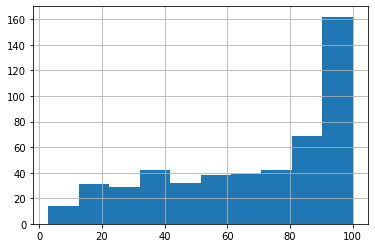

In [19]:
x_full.AGE.hist()

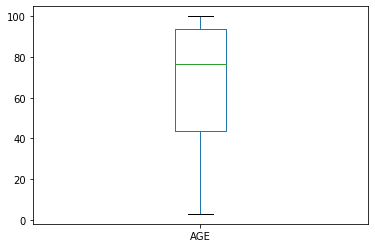

In [20]:
x_full.AGE.plot(kind='box')

Оставляем эту переменную без изменений

Рассмотрим DIS

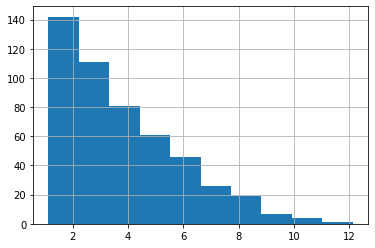

In [21]:
x_full.DIS.hist()

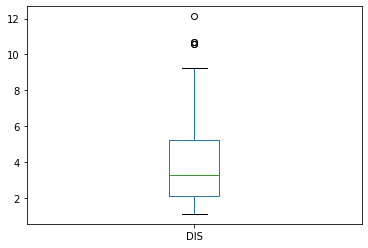

In [22]:
x_full.DIS.plot(kind='box')

Уберем выброс больше 12

In [51]:
x_full = x_full[x_full.DIS < 12]
x_full.shape

(497, 13)

Рассмотрим RAD

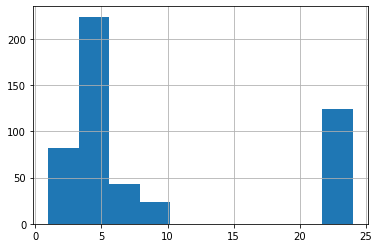

In [24]:
x_full.RAD.hist()

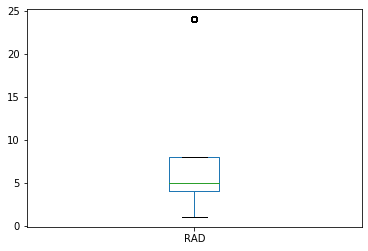

In [25]:
x_full.RAD.plot(kind='box')

In [26]:
out1 = x_full[x_full.RAD > 20]
out1

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
356,8.98296,0.0,18.1,0.770,6.212,97.4,2.1222,24.0,666.0,20.2,377.73,17.60,17.8
357,3.84970,0.0,18.1,0.770,6.395,91.0,2.5052,24.0,666.0,20.2,391.34,13.27,21.7
358,5.20177,0.0,18.1,0.770,6.127,83.4,2.7227,24.0,666.0,20.2,395.43,11.48,22.7
359,4.26131,0.0,18.1,0.770,6.112,81.3,2.5091,24.0,666.0,20.2,390.74,12.67,22.6
360,4.54192,0.0,18.1,0.770,6.398,88.0,2.5182,24.0,666.0,20.2,374.56,7.79,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
483,2.81838,0.0,18.1,0.532,5.762,40.3,4.0983,24.0,666.0,20.2,392.92,10.42,21.8
484,2.37857,0.0,18.1,0.583,5.871,41.9,3.7240,24.0,666.0,20.2,370.73,13.34,20.6
485,3.67367,0.0,18.1,0.583,6.312,51.9,3.9917,24.0,666.0,20.2,388.62,10.58,21.2
486,5.69175,0.0,18.1,0.583,6.114,79.8,3.5459,24.0,666.0,20.2,392.68,14.98,19.1


Оставляем эти данные без изменений

Рассмотрим TAX

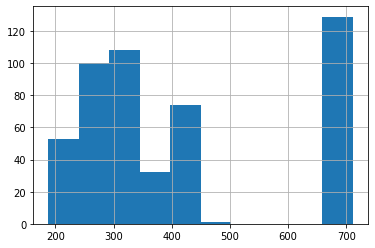

In [27]:
x_full.TAX.hist()

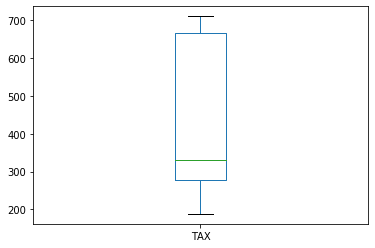

In [28]:
x_full.TAX.plot(kind='box')

Оставляем эти данные без изменений

Рассмотрим PTRATIO

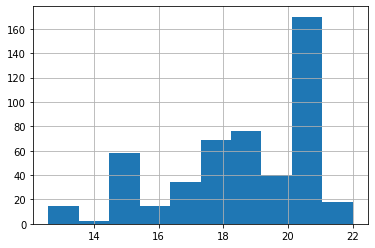

In [29]:
x_full.PTRATIO.hist()

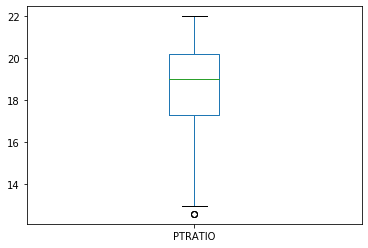

In [30]:
x_full.PTRATIO.plot(kind='box')

Удалим выбросы менее 13

In [52]:
x_full = x_full[x_full.PTRATIO > 13]
x_full.shape

(482, 13)

Рассмотрим В

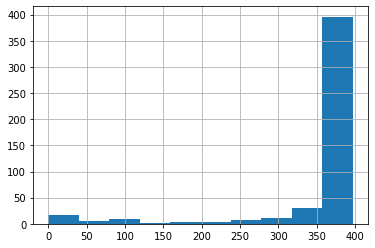

In [32]:
x_full.B.hist()

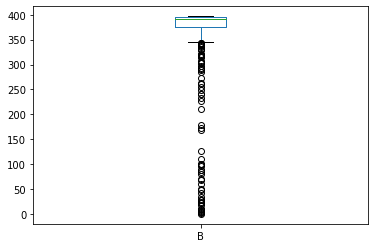

In [33]:
x_full.B.plot(kind='box')

Оставим данные без изменений

Рассмотрим LSTAT

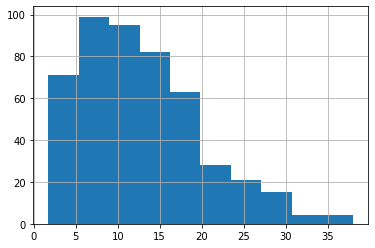

In [34]:
x_full.LSTAT.hist()

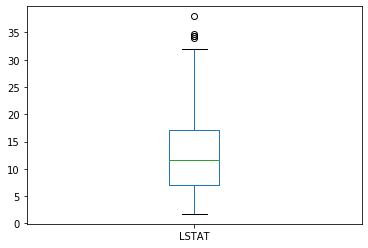

In [35]:
x_full.LSTAT.plot(kind='box')

In [36]:
out1 = x_full[x_full.LSTAT > 35]
out1

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
374,18.4982,0.0,18.1,0.668,4.138,100.0,1.137,24.0,666.0,20.2,396.9,37.97,13.8


Удалим выброс больше 35

In [53]:
x_full = x_full[x_full.LSTAT < 35]
x_full.shape

(481, 13)

Построим модель на обработанных данных

In [58]:
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(x_step1, y_step1, test_size=0.3, random_state=42)
lin_model1 = LinearRegression()
lin_model1.fit(X_train1, Y_train1)
y_train_predict1 = lin_model1.predict(X_train1)
rmse1 = (np.sqrt(mean_squared_error(Y_train1, y_train_predict1)))#
print(f'Train: {rmse1}')
y_test_predict1 = lin_model1.predict(X_test1)
rmse1 = (np.sqrt(mean_squared_error(Y_test1, y_test_predict1)))# 
print(f'Test: {rmse1}')

Train: 4.966785099574119
Test: 3.8651697522876955


Модель улучшилась:
rmse был - 4.6386
rmse стал - 3.8652

Теперь рассмотримцелевую переменную

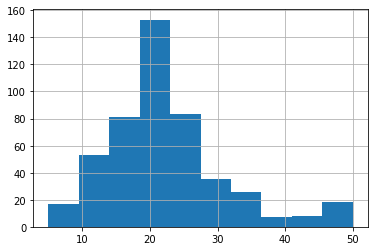

In [56]:
x_full.MEDV.hist()

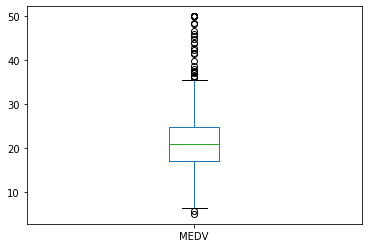

In [57]:
x_full.MEDV.plot(kind='box')

Можно сделать предположения, что это отредактированые данные либо неудачная замена пропусков, так как они не укладываются в стандартное распределение искомой величины. Попробуем удалить эти значения и построить модель

In [59]:
x_full = x_full[x_full.MEDV != 50]
x_full.shape

(467, 13)

In [60]:
x_step2 = x_full.copy()
y_step2 = x_full.MEDV
del x_step2['MEDV']

In [61]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(x_step2, y_step2, test_size=0.3, random_state=42)
lin_model2 = LinearRegression()
lin_model2.fit(X_train2, Y_train2)
y_train_predict2 = lin_model2.predict(X_train2)
rmse2 = (np.sqrt(mean_squared_error(Y_train2, y_train_predict2)))
print(f'Train: {rmse2}')
y_test_predict2 = lin_model2.predict(X_test2)
rmse1 = (np.sqrt(mean_squared_error(Y_test2, y_test_predict2)))# 
print(f'Test: {rmse2}')

Train: 3.600260054909504
Test: 3.600260054909504


Модель еще больше улучшилась: изначально rmse был - 4.6386, потом стал rmse стал - 3.8652, а теперь rmse стал - 3.600